In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
current_directory = './'
file_path = '/content/drive/MyDrive/CJ올리브네트웍스_AIHub/working.csv'
df = pd.read_csv(file_path, encoding='euc-kr')
df.head()


순번        취업일자    연령  장애유형 중증여부    근무지역    취업직종대분류
0  1.0  2022-06-01  26.0  정신장애   중증  경기 용인시  경영·행정·사무직
1  2.0  2022-01-01  28.0  지적장애   중증  충북 영동군  경영·행정·사무직
2  3.0  2022-01-01  19.0  지적장애   중증  충북 영동군  경영·행정·사무직
3  4.0  2022-01-01  22.0  지적장애   중증  충북 영동군  경영·행정·사무직
4  5.0  2022-01-01  23.0  지적장애   중증  충북 영동군  경영·행정·사무직

In [5]:
df['근무지역'] = df['근무지역'].str[:2]

In [6]:
df.isnull().sum()

순번         1461
취업일자       1461
연령         1461
장애유형       1461
중증여부       1461
근무지역       1461
취업직종대분류    1461
dtype: int64

In [7]:
df = df.dropna()


In [8]:
df.isnull().sum()

순번         0
취업일자       0
연령         0
장애유형       0
중증여부       0
근무지역       0
취업직종대분류    0
dtype: int64

In [9]:
df

순번        취업일자    연령  장애유형 중증여부 근무지역             취업직종대분류
0          1.0  2022-06-01  26.0  정신장애   중증   경기           경영·행정·사무직
1          2.0  2022-01-01  28.0  지적장애   중증   충북           경영·행정·사무직
2          3.0  2022-01-01  19.0  지적장애   중증   충북           경영·행정·사무직
3          4.0  2022-01-01  22.0  지적장애   중증   충북           경영·행정·사무직
4          5.0  2022-01-01  23.0  지적장애   중증   충북           경영·행정·사무직
...        ...         ...   ...   ...  ...  ...                 ...
45112  45113.0  2022-12-02  72.0  지체장애   경증   강원      청소 및 기타 개인서비스직
45113  45114.0  2022-12-19  24.0  지체장애   경증   경기  정보통신 연구개발직 및 공학기술직
45114  45115.0  2022-03-21  67.0  지체장애   중증   경기              제조 단순직
45115  45116.0  2022-09-15  28.0  시각장애   경증   대구           경영·행정·사무직
45116  45117.0  2022-11-28  30.0  지체장애   중증   울산    제조 연구개발직 및 공학기술직

[45117 rows x 7 columns]

# 데이터프레임 만들기

In [10]:
unique_values = df['취업직종대분류'].unique()
unique_values

array(['경영·행정·사무직', '청소 및 기타 개인서비스직', '돌봄 서비스직(간병·육아)',
       '인쇄·목재·공예 및 기타 설치·정비·생산직', '제조 단순직', '보건·의료직', '경호·경비직', '금융·보험직',
       '전기·전자 설치·정비·생산직', '운전·운송직', '사회복지·종교직', '식품 가공·생산직',
       '관리직(임원·부서장)', '화학·환경 설치·정비·생산직', '예술·디자인·방송직', '스포츠·레크리에이션직',
       '영업·판매직', '교육직', '기계 설치·정비·생산직', '제조 연구개발직 및 공학기술직', '정보통신 설치·정비직',
       '음식 서비스직', '건설·채굴직', '정보통신 연구개발직 및 공학기술직', '건설·채굴 연구개발직 및 공학기술직',
       '여행·숙박·오락 서비스직', '섬유·의복 생산직', '미용·예식 서비스직',
       '금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)', '농림어업직', '자연·생명과학 연구직', '법률직',
       '인문·사회과학 연구직'], dtype=object)

In [11]:
current_directory = './'
file_path = '/content/drive/MyDrive/CJ올리브네트웍스_AIHub/Jobseeker.csv'
jobseeker = pd.read_csv(file_path, encoding='euc-kr')
jobseeker.head()

연번       구직등록일  연령        희망지역                         희망직종      희망임금  \
0   1  2022-01-01  39      경기 수원시  기타 서비스 단순종사원(사우나,찜질방 정리원 등)  (시급)8720   
1   2  2022-01-01  39       서울특별시                사무 보조원(일반사업체)  (시급)9160   
2   3  2022-01-01  57      충남 당진시                 사무 보조원(공공기관)  (시급)9160   
3   4  2022-01-01  40      충남 서산시              음료 조리사(바리스타 포함)  (시급)9160   
4   5  2022-01-01  35  충남 천안시 서북구                   자동조립라인 조작원  (시급)9160   

    장애유형 중증여부 기관분류  
0   지적장애   중증   공단  
1   지체장애   경증   공단  
2   지체장애   경증   공단  
3  뇌병변장애   경증   공단  
4   청각장애   중증   공단

In [12]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

job_categories = df['취업직종대분류'].unique()

specific_job = '기타 서비스 단순종사원(사우나,찜질방 정리원 등)'
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 2))
job_category_vectors = vectorizer.fit_transform(job_categories)

specific_job_vector = vectorizer.transform([specific_job])

def jaccard_similarity(vec1, vec2):
    intersection = np.logical_and(vec1, vec2)
    union = np.logical_or(vec1, vec2)
    return np.sum(intersection) / np.sum(union)

similarities = [jaccard_similarity(specific_job_vector.toarray(), vec.toarray()) for vec in job_category_vectors]

max_similarity = max(similarities)
most_similar_index = similarities.index(max_similarity)
most_similar_category = job_categories[most_similar_index]

print(f"입력된 직업군: {specific_job}")
print(f"가장 높은 자카드 유사도: {max_similarity:.2f}")
print(f"가장 유사한 직업군: {most_similar_category}")


입력된 직업군: 기타 서비스 단순종사원(사우나,찜질방 정리원 등)
가장 높은 자카드 유사도: 0.25
가장 유사한 직업군: 음식 서비스직


In [16]:
jobseeker

연번       구직등록일  연령        희망지역                          희망직종  \
0          1  2022-01-01  39      경기 수원시   기타 서비스 단순종사원(사우나,찜질방 정리원 등)   
1          2  2022-01-01  39       서울특별시                 사무 보조원(일반사업체)   
2          3  2022-01-01  57      충남 당진시                  사무 보조원(공공기관)   
3          4  2022-01-01  40      충남 서산시               음료 조리사(바리스타 포함)   
4          5  2022-01-01  35  충남 천안시 서북구                    자동조립라인 조작원   
...      ...         ...  ..         ...                           ...   
34486  34487  2022-12-30  19      경기 수원시  인쇄, 목재, 가구 및 기타 제조 분야 단순 종사원   
34487  34488  2022-12-30  28      경기 부천시   기타 서비스 단순종사원(사우나,찜질방 정리원 등)   
34488  34489  2022-12-30  36      경북 포항시                       직업 운동선수   
34489  34490  2022-12-30  43     서울 영등포구                 사회복지사(사회복지시설)   
34490  34491  2022-12-30  47      인천 부평구                  사무 보조원(공공기관)   

           희망임금   장애유형 중증여부 기관분류  
0      (시급)8720   지적장애   중증   공단  
1      (시급)9160   지체장애   경증   공단  
2      (시급)9160   지체장애   경증   공단  
3      (시급)9160  뇌병변장애   경증   공단  
4      (시급)9160   청각장애   중증   공단  
...         ...    ...  ...  ...  
34486  (시급)9160   지적장애   중증   공단  
34487  (시급)9160   지적장애   중증   공단  
34488  (시급)9160   지적장애   중증   공단  
34489  (시급)9160   청각장애   중증   공단  
34490  (시급)9160  뇌병변장애   중증   공단  

[34491 rows x 9 columns]

# 새로운 데이터프레임 만들기

In [14]:
current_directory = './'
file_path = '/content/drive/MyDrive/CJ올리브네트웍스_AIHub/Recruiter.csv'
Recruiter = pd.read_csv(file_path, encoding='euc-kr')
Recruiter.head()

연번      구인신청일자                   모집기간        사업장명                     모집직종  \
0   1  2023-11-30  2023-11-30~2023-12-31      현대아라아트            공예 보조원(공예견습생)   
1   2  2023-11-30  2023-11-30~2023-12-05        하나증권                   사무 보조원   
2   3  2023-11-30  2023-11-30~2023-12-31        의성군청  사무 보조원(국가 및 자치단체, 공공기관)   
3   4  2023-11-30  2023-11-30~2024-01-31  케이티네크워크(주)          전기·전자 분야 단순 종사원   
4   5  2023-11-30  2023-11-30~2024-01-31   (주)모아종합건설                주차 관리·안내원   

  고용형태 임금형태       임금 입사형태  요구경력 요구학력 전공계열 요구자격증  \
0  시간제   시급     9620   무관  0년개월   무관  NaN         
1  계약직   월급  1800000   신입    무관   무관  NaN         
2  계약직   월급  2060740   무관    무관   무관  NaN         
3  상용직   시급     9620   무관  0년개월   무관  NaN         
4  상용직   시급     9620   무관  0년개월   무관  NaN         

                                        사업장 주소   기업형태    담당기관         등록일  \
0  인천광역시 미추홀구 경인로 372 (주안동, 포레나 미추홀) B2층 2101호     중소    인천지사  2023-11-30   
1                   서울특별시 영등포구 의사당대로 82 (여의도동)    대기업  서울남부지사  2023-11-30   
2                    경상북도 의성군 의성읍 군청길 31 (후죽리)  공사,공공    경북지사  2023-11-30   
3                  광주광역시 광산구 하남산단9번로 196 (도천동)     중소  광주지역본부  2023-11-30   
4                      광주광역시 북구 서암대로 205 (중흥동)     중소  광주지역본부  2023-11-30   

         연락처  
0  1588-1819  
1  1588-1819  
2  1588-1819  
3  1588-1819  
4  1588-1819

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

job_categories = df['취업직종대분류'].unique()

vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 2))
job_category_vectors = vectorizer.fit_transform(job_categories)

tqdm.pandas(desc="Calculating Similarity")
Recruiter['가장_유사한_직업군'] = Recruiter['모집직종'].progress_apply(lambda x: job_categories[np.argmax([np.sum(np.logical_and(vectorizer.transform([x]).toarray(), vec.toarray())) / np.sum(np.logical_or(vectorizer.transform([x]).toarray(), vec.toarray())) for vec in job_category_vectors])])

print(Recruiter[['모집직종', '가장_유사한_직업군']])


In [ ]:
Recruiter.to_excel('jobseeker_Recruiter_jaccard.xlsx', index=False, encoding='utf-8')


In [ ]:
import os

current_directory = './'
file_path = '/content/drive/MyDrive/CJ올리브네트웍스_AIHub/jobseeker_Recruiter_jaccard.xlsx'

abs_file_path = os.path.join(current_directory, file_path)

df_Recruiter = pd.read_excel(abs_file_path)
df_Recruiter.head()

In [ ]:
import plotly.express as px

top_5_jobseeker =df_Recruiter['가장_유사한_직업군'].value_counts().head(5).reset_index()
fig = px.pie(top_5_jobseeker, names='index', values='가장_유사한_직업군', title='구인업체가 뽑는 5개 상위 직무')

fig.show()

구인업체

In [ ]:
import os

current_directory = './'
file_path = '/content/drive/MyDrive/CJ올리브네트웍스_AIHub/jobseeker_Recruiter_jaccard.xlsx'

# 절대 경로로 변환
abs_file_path = os.path.join(current_directory, file_path)

# 파일 읽기
df_Recruiter = pd.read_excel(abs_file_path)
df_Recruiter

연번      구인신청일자                   모집기간        사업장명  \
0        1  2023-11-30  2023-11-30~2023-12-31      현대아라아트   
1        2  2023-11-30  2023-11-30~2023-12-05        하나증권   
2        3  2023-11-30  2023-11-30~2023-12-31        의성군청   
3        4  2023-11-30  2023-11-30~2024-01-31  케이티네크워크(주)   
4        5  2023-11-30  2023-11-30~2024-01-31   (주)모아종합건설   
...    ...         ...                    ...         ...   
1111  1112  2023-11-01  2023-11-01~2023-12-31        신안군청   
1112  1113  2023-11-01  2023-11-06~2023-12-31    주식회사 손지음   
1113  1114  2023-11-01  2023-11-01~2023-12-31    강원도 고성군청   
1114  1115  2023-11-01  2023-11-01~2023-12-31   한국생명공학연구원   
1115  1116  2023-11-01  2023-11-01~2023-11-06    (주)신영와코루   

                         모집직종 고용형태 임금형태        임금 입사형태  요구경력 요구학력  전공계열 요구자격증  \
0               공예 보조원(공예견습생)  시간제   시급      9620   무관  0년개월   무관   NaN         
1                      사무 보조원  계약직   월급   1800000   신입    무관   무관   NaN         
2     사무 보조원(국가 및 자치단체, 공공기관)  계약직   월급   2060740   무관    무관   무관   NaN         
3             전기·전자 분야 단순 종사원  상용직   시급      9620   무관  0년개월   무관   NaN         
4                   주차 관리·안내원  상용직   시급      9620   무관  0년개월   무관   NaN         
...                       ...  ...  ...       ...  ...   ...  ...   ...   ...   
1111                   일반 간호사  상용직   월급   2100000   무관    무관   무관   NaN         
1112  제품 포장원(섬유, 전기전자, 식품 제외)  상용직   시급      9620   경력  3년개월   무관   NaN         
1113              국가·지방행정 사무원  상용직   월급   2472655   무관    무관   무관   NaN         
1114  사무 보조원(국가 및 자치단체, 공공기관)  계약직   월급   1876000   무관    무관   무관   NaN         
1115       마케팅·광고·홍보·상품기획 사무원  상용직   연봉  32000000   무관    무관   대졸  섬유공학         

                                           사업장 주소   기업형태    담당기관         등록일  \
0     인천광역시 미추홀구 경인로 372 (주안동, 포레나 미추홀) B2층 2101호     중소    인천지사  2023-11-30   
1                      서울특별시 영등포구 의사당대로 82 (여의도동)    대기업  서울남부지사  2023-11-30   
2                       경상북도 의성군 의성읍 군청길 31 (후죽리)  공사,공공    경북지사  2023-11-30   
3                     광주광역시 광산구 하남산단9번로 196 (도천동)     중소  광주지역본부  2023-11-30   
4                         광주광역시 북구 서암대로 205 (중흥동)     중소  광주지역본부  2023-11-30   
...                                           ...    ...     ...         ...   
1111            전라남도 신안군 압해읍 천사로 1004 (신장리), 신안군청  공사,공공    전남지사  2023-11-01   
1112               경기도 김포시 통진읍 고척로 237-5 주식회사 손지음     중소  경기북부지사  2023-11-13   
1113               강원도 고성군 간성읍 고성중앙길 9 (하리), 고성군청  공사,공공    강원지사  2023-11-01   
1114                      대전광역시 유성구 과학로 125 (어은동)     중소    충북지사  2023-11-01   
1115                     서울특별시 금천구 가산디지털1로 104 1층     중소  서울남부지사  2023-11-01   

            연락처               가장_유사한_직업군  
0     1588-1819  인쇄·목재·공예 및 기타 설치·정비·생산직  
1     1588-1819                경영·행정·사무직  
2     1588-1819         제조 연구개발직 및 공학기술직  
3     1588-1819          전기·전자 설치·정비·생산직  
4     1588-1819              관리직(임원·부서장)  
...         ...                      ...  
1111  1588-1819                경영·행정·사무직  
1112  1588-1819                식품 가공·생산직  
1113  1588-1819                경영·행정·사무직  
1114  1588-1819         제조 연구개발직 및 공학기술직  
1115  1588-1819                경영·행정·사무직  

[1116 rows x 19 columns]

In [ ]:
top_3 = df_Recruiter['요구학력'].value_counts().head(5)
top_3

무관     1053
고졸       39
대졸       13
초대졸      11
Name: 요구학력, dtype: int64

구직자시작

In [ ]:
import os

current_directory = './'
file_path = '/content/drive/MyDrive/CJ올리브네트웍스_AIHub/jobseeker_유사직업_jaccard.xlsx'

# 절대 경로로 변환
abs_file_path = os.path.join(current_directory, file_path)

# 파일 읽기
df_jobseeker = pd.read_excel(abs_file_path)
df_jobseeker


연번       구직등록일  연령        희망지역                          희망직종  \
0          1  2022-01-01  39      경기 수원시   기타 서비스 단순종사원(사우나,찜질방 정리원 등)   
1          2  2022-01-01  39       서울특별시                 사무 보조원(일반사업체)   
2          3  2022-01-01  57      충남 당진시                  사무 보조원(공공기관)   
3          4  2022-01-01  40      충남 서산시               음료 조리사(바리스타 포함)   
4          5  2022-01-01  35  충남 천안시 서북구                    자동조립라인 조작원   
...      ...         ...  ..         ...                           ...   
34486  34487  2022-12-30  19      경기 수원시  인쇄, 목재, 가구 및 기타 제조 분야 단순 종사원   
34487  34488  2022-12-30  28      경기 부천시   기타 서비스 단순종사원(사우나,찜질방 정리원 등)   
34488  34489  2022-12-30  36      경북 포항시                       직업 운동선수   
34489  34490  2022-12-30  43     서울 영등포구                 사회복지사(사회복지시설)   
34490  34491  2022-12-30  47      인천 부평구                  사무 보조원(공공기관)   

           희망임금   장애유형 중증여부 기관분류      가장_유사한_직업군  
0      (시급)8720   지적장애   중증   공단         음식 서비스직  
1      (시급)9160   지체장애   경증   공단       경영·행정·사무직  
2      (시급)9160   지체장애   경증   공단       경영·행정·사무직  
3      (시급)9160  뇌병변장애   경증   공단  청소 및 기타 개인서비스직  
4      (시급)9160   청각장애   중증   공단       경영·행정·사무직  
...         ...    ...  ...  ...             ...  
34486  (시급)9160   지적장애   중증   공단          제조 단순직  
34487  (시급)9160   지적장애   중증   공단         음식 서비스직  
34488  (시급)9160   지적장애   중증   공단       경영·행정·사무직  
34489  (시급)9160   청각장애   중증   공단        사회복지·종교직  
34490  (시급)9160  뇌병변장애   중증   공단       경영·행정·사무직  

[34491 rows x 10 columns]

In [ ]:
df_jobseeker['희망지역'] = df_jobseeker['희망지역'].str[:2]

In [ ]:
top_5_jobs = df_jobseeker['희망지역'].value_counts().head(5)
top_5_jobs

서울    5916
경기    5862
부산    2635
경남    2195
충북    1714
Name: 희망지역, dtype: int64

In [ ]:
top_5_jobs = df_jobseeker['가장_유사한_직업군'].value_counts().head(5)


In [ ]:
top_5_jobs

경영·행정·사무직                            11515
제조 단순직                                5943
청소 및 기타 개인서비스직                        5201
음식 서비스직                               2767
금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)     2348
Name: 가장_유사한_직업군, dtype: int64

In [ ]:
top_5_jobs = df_jobseeker['장애유형'].value_counts().head(5)
top_5_jobs

지적장애    12881
지체장애     8189
정신장애     2725
청각장애     2603
시각장애     2521
Name: 장애유형, dtype: int64

구직자

In [ ]:
import plotly.express as px


In [ ]:
# 히스토그램 그리기
fig = px.histogram(df_jobseeker, x="연령", nbins=100, title="나이 분포 히스토그램",
                   labels={"연령": "연령", "count": "빈도"}, template="plotly_dark")

fig.update_traces(marker_color='rgba(255, 127, 14, 0.6)', marker_line_color='rgba(255, 127, 14, 1)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text="나이 분포 히스토그램",
                  xaxis_title="연령", yaxis_title="빈도",
                  font=dict(family="Arial, sans-serif", size=12, color="white"),
                  margin=dict(l=0, r=0, t=40, b=0))

fig.show()

In [ ]:
import plotly.express as px

top_5_jobseeker = df_jobseeker['가장_유사한_직업군'].value_counts().head(5).reset_index()

# Create the pie chart
fig = px.pie(top_5_jobseeker, names='index', values='가장_유사한_직업군', title='상위 5개 가고싶은 직무!')

# Modify the layout to change background color
fig.update_layout(
    paper_bgcolor='lightgray',  # Set the background color of the entire chart
    plot_bgcolor='lightgray'    # Set the background color of the plot area
)

fig.show()



In [ ]:
import plotly.express as px

df_jobseeker['나이대'] = pd.cut(df_jobseeker['연령'], bins=range(20, 90, 10), labels=[f'{i}대' for i in range(20, 80, 10)])
counts = df_jobseeker.groupby(['나이대', '가장_유사한_직업군']).size().reset_index(name='Count')
top_5_disabilities = counts.groupby('나이대').sum().nlargest(6, 'Count').index
top_5_jobs = counts.groupby('가장_유사한_직업군').sum().nlargest(3, 'Count').index
counts_top_5 = counts[(counts['나이대'].isin(top_5_disabilities)) & (counts['가장_유사한_직업군'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['나이대'], values='Count', title='나이대 별 가장 유사한 직업군 분포')
fig.show()


<ipython-input-18-5cd33f786fa9>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-18-5cd33f786fa9>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import plotly.express as px
import pandas as pd

df_jobseeker['나이대'] = pd.cut(df_jobseeker['연령'], bins=range(20, 90, 10), labels=[f'{i}대' for i in range(20, 80, 10)])
counts = df_jobseeker.groupby(['나이대', '가장_유사한_직업군']).size().reset_index(name='Count')
top_5_disabilities = counts.groupby('나이대').sum().nlargest(6, 'Count').index
top_5_jobs = counts.groupby('가장_유사한_직업군').sum().nlargest(3, 'Count').index
counts_top_5 = counts[(counts['나이대'].isin(top_5_disabilities)) & (counts['가장_유사한_직업군'].isin(top_5_jobs))]

total_counts = counts_top_5['Count'].sum()
counts_top_5['Percentage'] = (counts_top_5['Count'] / total_counts) * 100
fig = px.sunburst(counts_top_5, path=['나이대'], values='Count', title='나이대 별 가장 유사한 직업군 분포')
fig.show()


<ipython-input-19-5a6918b64e2b>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-19-5a6918b64e2b>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-19-5a6918b64e2b>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px

df_jobseeker['나이대'] = pd.cut(df_jobseeker['연령'], bins=range(20, 90, 10), labels=[f'{i}대' for i in range(20, 80, 10)])
counts = df_jobseeker.groupby(['나이대', '가장_유사한_직업군']).size().reset_index(name='Count')
top_5_disabilities = counts.groupby('나이대').sum().nlargest(5, 'Count').index
top_5_jobs = counts.groupby('가장_유사한_직업군').sum().nlargest(3, 'Count').index
counts_top_5 = counts[(counts['나이대'].isin(top_5_disabilities)) & (counts['가장_유사한_직업군'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['나이대', '가장_유사한_직업군'], values='Count', title='장애유형 별..')
fig.show()

<ipython-input-21-fb9e6250fb69>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-21-fb9e6250fb69>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
df_jobseeker

연번       구직등록일  연령        희망지역                          희망직종  \
0          1  2022-01-01  39      경기 수원시   기타 서비스 단순종사원(사우나,찜질방 정리원 등)   
1          2  2022-01-01  39       서울특별시                 사무 보조원(일반사업체)   
2          3  2022-01-01  57      충남 당진시                  사무 보조원(공공기관)   
3          4  2022-01-01  40      충남 서산시               음료 조리사(바리스타 포함)   
4          5  2022-01-01  35  충남 천안시 서북구                    자동조립라인 조작원   
...      ...         ...  ..         ...                           ...   
34486  34487  2022-12-30  19      경기 수원시  인쇄, 목재, 가구 및 기타 제조 분야 단순 종사원   
34487  34488  2022-12-30  28      경기 부천시   기타 서비스 단순종사원(사우나,찜질방 정리원 등)   
34488  34489  2022-12-30  36      경북 포항시                       직업 운동선수   
34489  34490  2022-12-30  43     서울 영등포구                 사회복지사(사회복지시설)   
34490  34491  2022-12-30  47      인천 부평구                  사무 보조원(공공기관)   

           희망임금   장애유형 중증여부 기관분류      가장_유사한_직업군  나이대  
0      (시급)8720   지적장애   중증   공단         음식 서비스직  30대  
1      (시급)9160   지체장애   경증   공단       경영·행정·사무직  30대  
2      (시급)9160   지체장애   경증   공단       경영·행정·사무직  50대  
3      (시급)9160  뇌병변장애   경증   공단  청소 및 기타 개인서비스직  30대  
4      (시급)9160   청각장애   중증   공단       경영·행정·사무직  30대  
...         ...    ...  ...  ...             ...  ...  
34486  (시급)9160   지적장애   중증   공단          제조 단순직  NaN  
34487  (시급)9160   지적장애   중증   공단         음식 서비스직  20대  
34488  (시급)9160   지적장애   중증   공단       경영·행정·사무직  30대  
34489  (시급)9160   청각장애   중증   공단        사회복지·종교직  40대  
34490  (시급)9160  뇌병변장애   중증   공단       경영·행정·사무직  40대  

[34491 rows x 11 columns]

In [ ]:
df_jobseeker['희망지역'] = df_jobseeker['희망지역'].str[:2]

In [ ]:
import plotly.express as px

df['나이대'] = pd.cut(df['연령'], bins=range(20, 90, 10), labels=[f'{i}대' for i in range(20, 80, 10)])
counts = df.groupby(['나이대', '취업직종대분류']).size().reset_index(name='Count')
top_5_disabilities = counts.groupby('나이대').sum().nlargest(5, 'Count').index
top_5_jobs = counts.groupby('취업직종대분류').sum().nlargest(3, 'Count').index
counts_top_5 = counts[(counts['나이대'].isin(top_5_disabilities)) & (counts['취업직종대분류'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['나이대', '취업직종대분류'], values='Count', title='장애유형 별..')
fig.show()

In [ ]:
import plotly.express as px
counts = df_jobseeker.groupby(['희망지역', '가장_유사한_직업군']).size().reset_index(name='Count')

top_5_disabilities = counts.groupby('희망지역').sum().nlargest(5, 'Count').index
top_5_jobs = counts.groupby('가장_유사한_직업군').sum().nlargest(3, 'Count').index

counts_top_5 = counts[(counts['희망지역'].isin(top_5_disabilities)) & (counts['가장_유사한_직업군'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['희망지역', '가장_유사한_직업군'], values='Count', title='장애유형 별..')
fig.show()

<ipython-input-31-506b6f2feaeb>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-31-506b6f2feaeb>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
counts = df_jobseeker.groupby(['장애유형', '가장_유사한_직업군']).size().reset_index(name='Count')
top_5_disabilities = counts.groupby('장애유형').sum().nlargest(5, 'Count').index
top_5_jobs = counts.groupby('가장_유사한_직업군').sum().nlargest(3, 'Count').index
counts_top_5 = counts[(counts['장애유형'].isin(top_5_disabilities)) & (counts['가장_유사한_직업군'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['장애유형', '가장_유사한_직업군'], values='Count', title='장애유형 별..')
fig.show()

<ipython-input-25-ab035032da34>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-25-ab035032da34>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import plotly.express as px
counts = df_jobseeker.groupby(['장애유형', '가장_유사한_직업군']).size().reset_index(name='Count')

top_5_disabilities = counts.groupby('장애유형').sum().nlargest(5, 'Count').index
top_5_jobs = counts.groupby('가장_유사한_직업군').sum().nlargest(3, 'Count').index

counts_top_5 = counts[(counts['장애유형'].isin(top_5_disabilities)) & (counts['가장_유사한_직업군'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['장애유형', '가장_유사한_직업군'], values='Count', title='장애유형 별..')
fig.show()

<ipython-input-32-8c19560f3fe5>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-32-8c19560f3fe5>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# 일하고있는사람

In [ ]:
import plotly.express as px

df['나이대'] = pd.cut(df['연령'], bins=range(20, 90, 10), labels=[f'{i}대' for i in range(20, 80, 10)])
counts = df.groupby(['나이대', '취업직종대분류']).size().reset_index(name='Count')
top_5_disabilities = counts.groupby('나이대').sum().nlargest(5, 'Count').index
top_5_jobs = counts.groupby('취업직종대분류').sum().nlargest(3, 'Count').index
counts_top_5 = counts[(counts['나이대'].isin(top_5_disabilities)) & (counts['취업직종대분류'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['나이대', '취업직종대분류'], values='Count', title='장애유형 별..')
fig.show()

<ipython-input-16-1642e3a3d409>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-16-1642e3a3d409>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import plotly.express as px

counts = df.groupby(['중증여부', '취업직종대분류']).size().reset_index(name='Count')
top_5_disabilities = counts.groupby('중증여부').sum().nlargest(2, 'Count').index
top_5_jobs = counts.groupby('취업직종대분류').sum().nlargest(3, 'Count').index
counts_top_5 = counts[(counts['중증여부'].isin(top_5_disabilities)) & (counts['취업직종대분류'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['중증여부', '취업직종대분류'], values='Count', title='장애유형 별..')
fig.show()

<ipython-input-14-df134f3975cf>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-14-df134f3975cf>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import plotly.express as px
counts = df.groupby(['근무지역', '취업직종대분류']).size().reset_index(name='Count')

top_5_disabilities = counts.groupby('근무지역').sum().nlargest(5, 'Count').index
top_5_jobs = counts.groupby('취업직종대분류').sum().nlargest(3, 'Count').index

counts_top_5 = counts[(counts['근무지역'].isin(top_5_disabilities)) & (counts['취업직종대분류'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['근무지역', '취업직종대분류'], values='Count', title='장애유형 별..')
fig.show()

<ipython-input-15-a23c3a615ee5>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-15-a23c3a615ee5>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import plotly.express as px
counts = df.groupby(['장애유형', '취업직종대분류']).size().reset_index(name='Count')

top_5_disabilities = counts.groupby('장애유형').sum().nlargest(5, 'Count').index
top_5_jobs = counts.groupby('취업직종대분류').sum().nlargest(3, 'Count').index

counts_top_5 = counts[(counts['장애유형'].isin(top_5_disabilities)) & (counts['취업직종대분류'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['장애유형', '취업직종대분류'], values='Count', title='장애유형 별..')
fig.show()

<ipython-input-11-c9e04bf612b7>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-11-c9e04bf612b7>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import plotly.express as px

counts = df.groupby(['장애유형', '취업직종대분류']).size().reset_index(name='Count')
manufacturing_counts = counts[counts['취업직종대분류'] == '제조 단순직']
total_counts_by_disability = counts.groupby('장애유형')['Count'].sum().nlargest(5).reset_index()
manufacturing_counts_top5 = manufacturing_counts[manufacturing_counts['장애유형'].isin(total_counts_by_disability['장애유형'])]

merged_counts = pd.merge(manufacturing_counts_top5, total_counts_by_disability, on='장애유형', suffixes=('_manufacturing', '_total'))

merged_counts['Percentage'] = (merged_counts['Count_manufacturing'] / merged_counts['Count_total']) * 100
fig = px.sunburst(merged_counts, path=['장애유형'], values='Percentage', title='상위 5개 장애유형 별 경영·행정·사무직 비율')

fig.show()


In [ ]:
import plotly.express as px

counts = df.groupby(['장애유형', '취업직종대분류']).size().reset_index(name='Count')
manufacturing_counts = counts[counts['취업직종대분류'] == '경영·행정·사무직']
total_counts_by_disability = counts.groupby('장애유형')['Count'].sum().nlargest(5).reset_index()
manufacturing_counts_top5 = manufacturing_counts[manufacturing_counts['장애유형'].isin(total_counts_by_disability['장애유형'])]
merged_counts = pd.merge(manufacturing_counts_top5, total_counts_by_disability, on='장애유형', suffixes=('_manufacturing', '_total'))
merged_counts['Percentage'] = (merged_counts['Count_manufacturing'] / merged_counts['Count_total']) * 100
fig = px.sunburst(merged_counts, path=['장애유형'], values='Percentage', title='상위 5개 장애유형 별 경영·행정·사무직 비율')

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
fig = px.histogram(df, x='연령', title='나이 분포')

fig.show()


In [ ]:
fig = px.pie(df, names='장애유형', title='장애 유형의 분포')

fig.show()

In [ ]:
counts = df.groupby(['장애유형', '취업직종대분류']).size().reset_index(name='Count')

top_5_disabilities = counts.groupby('장애유형').sum().nlargest(5, 'Count').index
top_5_jobs = counts.groupby('취업직종대분류').sum().nlargest(3, 'Count').index

counts_top_5 = counts[(counts['장애유형'].isin(top_5_disabilities)) & (counts['취업직종대분류'].isin(top_5_jobs))]

fig = px.sunburst(counts_top_5, path=['장애유형', '취업직종대분류'], values='Count', title='장애유형 별..')
fig.show()

<ipython-input-55-ffad7c171e34>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-55-ffad7c171e34>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import plotly.graph_objects as go
import pandas as pd

unique_groups = df['중증여부'].unique()

fig = go.Figure()

for i, group_name in enumerate(unique_groups):
    group_data = df[df['중증여부'] == group_name]

    # 빈도가 높은 상위 5개 항목 선택
    top_5_counts = group_data['취업직종대분류'].value_counts().head(5)

    bar_trace = go.Bar(x=top_5_counts.index, y=top_5_counts, name=f'중증여부: {group_name}')
    fig.add_trace(bar_trace)
fig.update_layout(
    barmode='group',
    showlegend=True,
    title_text="Top 5 취업직종대분류 빈도",
    title_x=0.5,
    height=len(unique_groups) * 300,
    width=800
)

fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

unique_groups = df['중증여부'].unique()


for i, group_name in enumerate(unique_groups):
    group_data = df[df['중증여부'] == group_name]
    top_5_counts = group_data['취업직종대분류'].value_counts().head(5)

    pie_trace = go.Pie(labels=top_5_counts.index, values=top_5_counts,
                      textinfo='label+percent', hole=0.3,
                      name=f'중증여부: {group_name}')
    fig.add_trace(pie_trace)

    fig.update_layout(
        barmode='group',
        showlegend=True,
        title_text="Top 5 취업직종대분류 빈도",
        title_x=0.5,
        height=len(unique_groups) * 300,
        width=800
    )

    fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

unique_groups = df['중증여부'].unique()
fig = go.Figure()

for group_name in unique_groups:
    group_data = df[df['중증여부'] == group_name]
    top_5_counts = group_data['취업직종대분류'].value_counts().head(5)
    bar_trace = go.Bar(x=top_5_counts.index, y=top_5_counts, name=f'중증여부: {group_name}')
    fig.add_trace(bar_trace)

fig.update_layout(
    barmode='group',
    showlegend=True,
    title_text="Top 5 취업직종대분류 빈도",
    title_x=0.5,
    height=600,
    width=800,
    xaxis=dict(title='취업직종대분류'),
    yaxis=dict(title='빈도'),
)

fig.show()


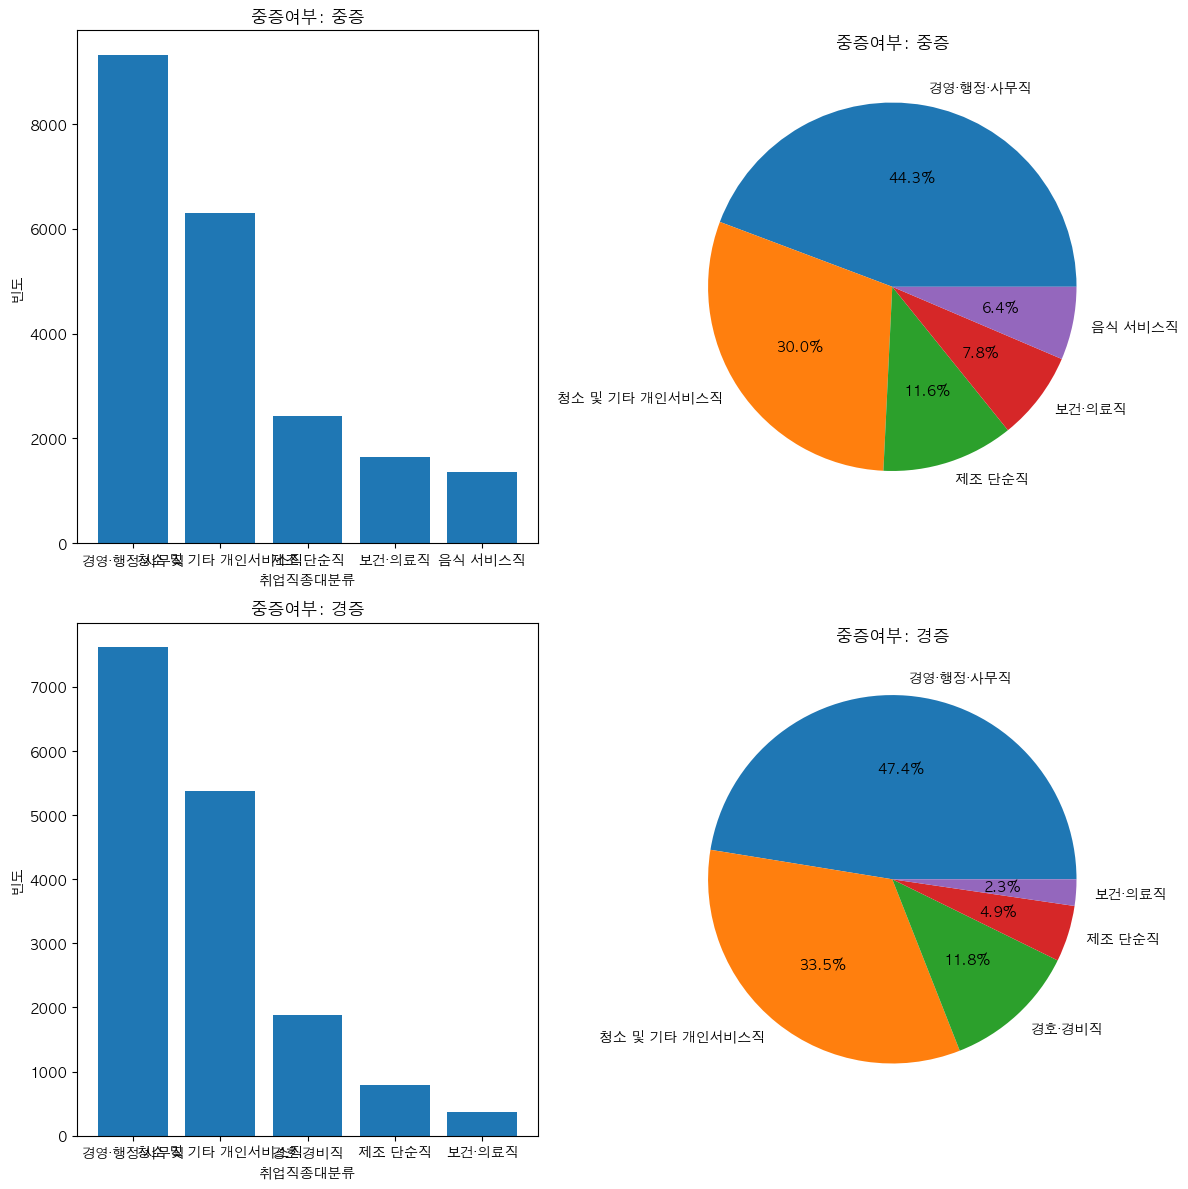

In [ ]:
unique_groups = df['중증여부'].unique()

fig, axes = plt.subplots(len(unique_groups), 2, figsize=(12, len(unique_groups) * 6))

for i, group_name in enumerate(unique_groups):
    group_data = df[df['중증여부'] == group_name]

    top_5_counts = group_data['취업직종대분류'].value_counts().head(5)
    axes[i, 0].bar(top_5_counts.index, top_5_counts)
    axes[i, 0].set_title(f'중증여부: {group_name}')
    axes[i, 0].set_xlabel('취업직종대분류')
    axes[i, 0].set_ylabel('빈도')
    region_counts = group_data['취업직종대분류'].value_counts().head(5)
    axes[i, 1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
    axes[i, 1].set_title(f'중증여부: {group_name}')

plt.tight_layout()
plt.show()


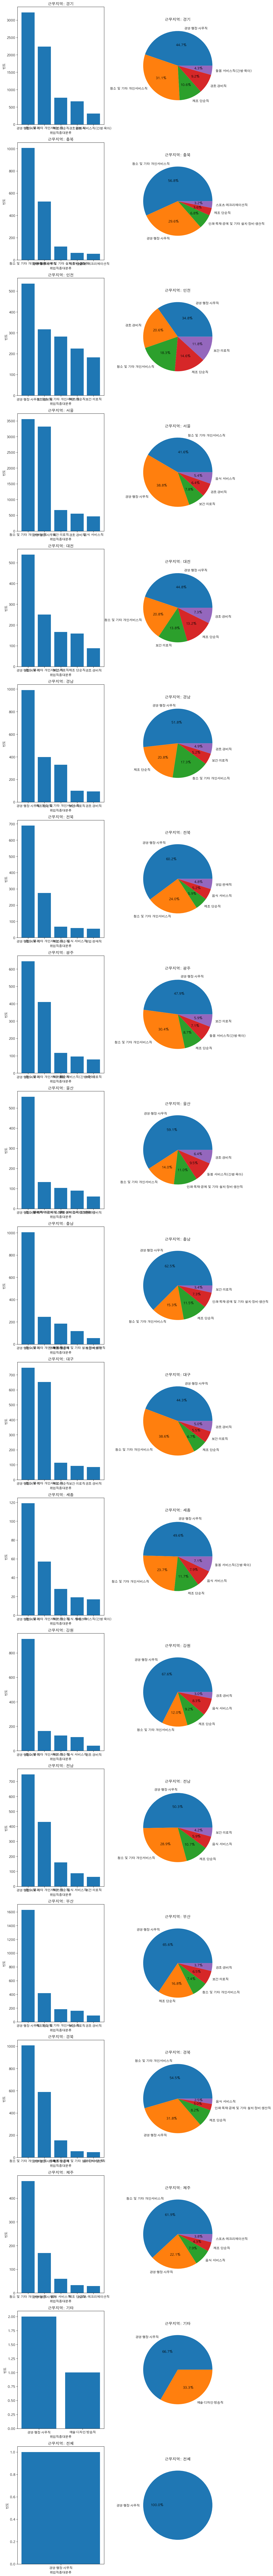

In [ ]:
unique_groups = df['근무지역'].unique()

fig, axes = plt.subplots(len(unique_groups), 2, figsize=(12, len(unique_groups) * 6))

for i, group_name in enumerate(unique_groups):
    group_data = df[df['근무지역'] == group_name]

    top_5_counts = group_data['취업직종대분류'].value_counts().head(5)
    axes[i, 0].bar(top_5_counts.index, top_5_counts)
    axes[i, 0].set_title(f'근무지역: {group_name}')
    axes[i, 0].set_xlabel('취업직종대분류')
    axes[i, 0].set_ylabel('빈도')
    region_counts = group_data['취업직종대분류'].value_counts().head(5)
    axes[i, 1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
    axes[i, 1].set_title(f'근무지역: {group_name}')

plt.tight_layout()
plt.show()


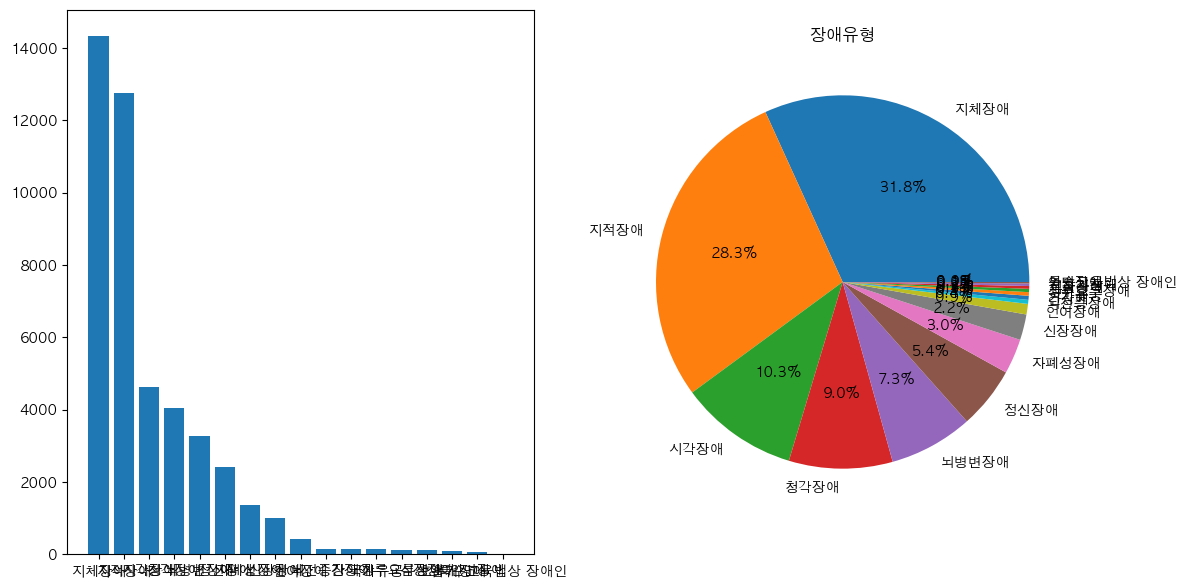

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

disabled_tight_counts = df['장애유형'].value_counts()
ax1.bar(disabled_tight_counts.index, disabled_tight_counts)

region_counts = df['장애유형'].value_counts()
ax2.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
ax2.set_title('장애유형')

plt.tight_layout()
plt.show()

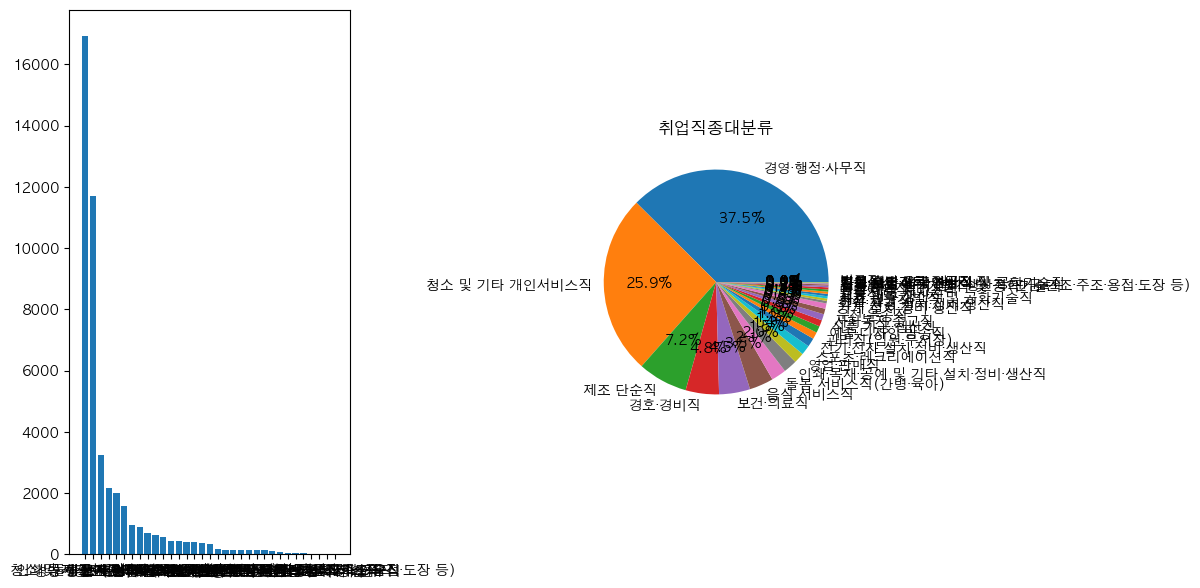

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

disabled_tight_counts = df['취업직종대분류'].value_counts()
ax1.bar(disabled_tight_counts.index, disabled_tight_counts)

region_counts = df['취업직종대분류'].value_counts()
ax2.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
ax2.set_title('취업직종대분류')

plt.tight_layout()
plt.show()

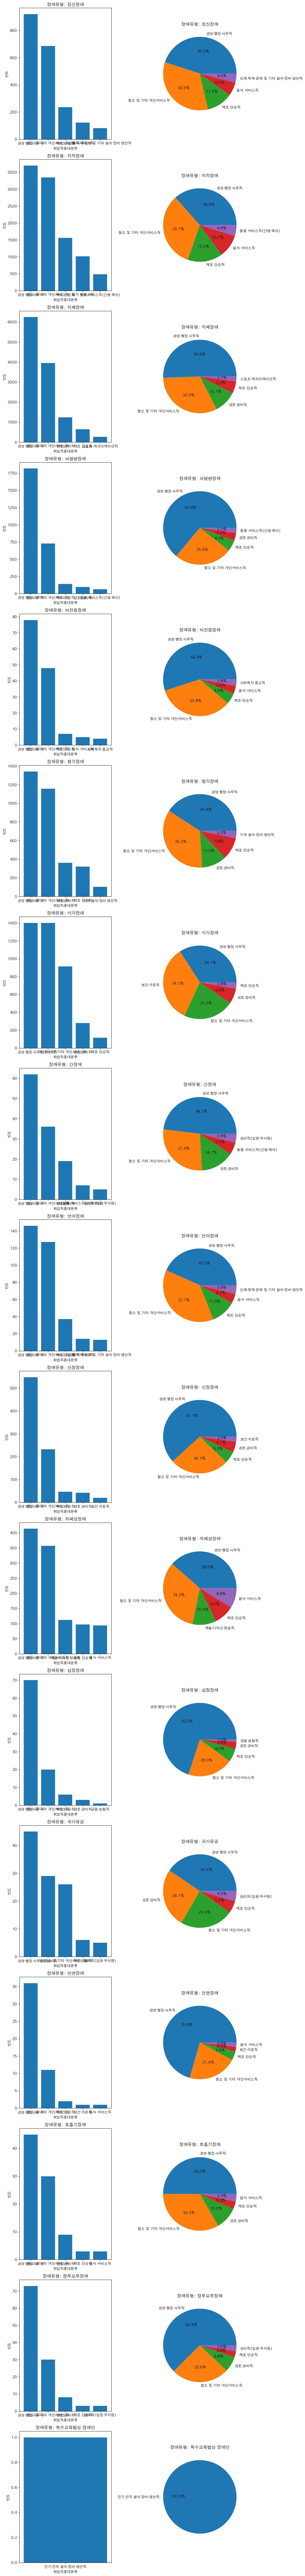

In [ ]:
unique_groups = df['장애유형'].unique()

fig, axes = plt.subplots(len(unique_groups), 2, figsize=(12, len(unique_groups) * 6))

for i, group_name in enumerate(unique_groups):
    group_data = df[df['장애유형'] == group_name]

    top_5_counts = group_data['취업직종대분류'].value_counts().head(5)
    axes[i, 0].bar(top_5_counts.index, top_5_counts)
    axes[i, 0].set_title(f'장애유형: {group_name}')
    axes[i, 0].set_xlabel('취업직종대분류')
    axes[i, 0].set_ylabel('빈도')
    region_counts = group_data['취업직종대분류'].value_counts().head(5)
    axes[i, 1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
    axes[i, 1].set_title(f'장애유형: {group_name}')

plt.tight_layout()
plt.show()


In [ ]:
df

순번        취업일자    연령  장애유형 중증여부 근무지역             취업직종대분류
0          1.0  2022-06-01  26.0  정신장애   중증   경기           경영·행정·사무직
1          2.0  2022-01-01  28.0  지적장애   중증   충북           경영·행정·사무직
2          3.0  2022-01-01  19.0  지적장애   중증   충북           경영·행정·사무직
3          4.0  2022-01-01  22.0  지적장애   중증   충북           경영·행정·사무직
4          5.0  2022-01-01  23.0  지적장애   중증   충북           경영·행정·사무직
...        ...         ...   ...   ...  ...  ...                 ...
45112  45113.0  2022-12-02  72.0  지체장애   경증   강원      청소 및 기타 개인서비스직
45113  45114.0  2022-12-19  24.0  지체장애   경증   경기  정보통신 연구개발직 및 공학기술직
45114  45115.0  2022-03-21  67.0  지체장애   중증   경기              제조 단순직
45115  45116.0  2022-09-15  28.0  시각장애   경증   대구           경영·행정·사무직
45116  45117.0  2022-11-28  30.0  지체장애   중증   울산    제조 연구개발직 및 공학기술직

[45117 rows x 7 columns]

## 예측모델 설계

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
ml_df = df[['연령', '장애유형', '중증여부', '근무지역','취업직종대분류']].copy()


In [ ]:
ml_df

연령  장애유형 중증여부 근무지역             취업직종대분류
0      26.0  정신장애   중증   경기           경영·행정·사무직
1      28.0  지적장애   중증   충북           경영·행정·사무직
2      19.0  지적장애   중증   충북           경영·행정·사무직
3      22.0  지적장애   중증   충북           경영·행정·사무직
4      23.0  지적장애   중증   충북           경영·행정·사무직
...     ...   ...  ...  ...                 ...
45112  72.0  지체장애   경증   강원      청소 및 기타 개인서비스직
45113  24.0  지체장애   경증   경기  정보통신 연구개발직 및 공학기술직
45114  67.0  지체장애   중증   경기              제조 단순직
45115  28.0  시각장애   경증   대구           경영·행정·사무직
45116  30.0  지체장애   중증   울산    제조 연구개발직 및 공학기술직

[45117 rows x 5 columns]

### 사용자로부터 입력

In [ ]:
user_input = {
    '연령': float(input("연령을 입력하세요: ")),
    '장애유형': input("장애유형을 입력하세요: "),
    '중증여부': input("중증여부를 입력하세요: "),
    '근무지역': input("근무지역을 입력하세요: "),
    '취업직종대분류': '과적합'
}

user_data = pd.DataFrame([user_input])
ml_df = ml_df.append(user_data, ignore_index=True)

# 결과 확인
print(ml_df)


연령을 입력하세요: 20
장애유형을 입력하세요: 지체장애
중증여부를 입력하세요: 경증
근무지역을 입력하세요: 경기도
         연령  장애유형 중증여부 근무지역             취업직종대분류
0      26.0  정신장애   중증   경기           경영·행정·사무직
1      28.0  지적장애   중증   충북           경영·행정·사무직
2      19.0  지적장애   중증   충북           경영·행정·사무직
3      22.0  지적장애   중증   충북           경영·행정·사무직
4      23.0  지적장애   중증   충북           경영·행정·사무직
...     ...   ...  ...  ...                 ...
45113  24.0  지체장애   경증   경기  정보통신 연구개발직 및 공학기술직
45114  67.0  지체장애   중증   경기              제조 단순직
45115  28.0  시각장애   경증   대구           경영·행정·사무직
45116  30.0  지체장애   중증   울산    제조 연구개발직 및 공학기술직
45117  20.0  지체장애   경증  경기도                 과적합

[45118 rows x 5 columns]


<ipython-input-35-ff0adcf8e97a>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = ml_df.iloc[:-1, :][['연령', '장애유형', '중증여부', '근무지역']]
y = ml_df.iloc[:-1, :]['취업직종대분류']
label_encoder = LabelEncoder()
X['장애유형'] = label_encoder.fit_transform(X['장애유형'])
X['중증여부'] = label_encoder.fit_transform(X['중증여부'])
X['근무지역'] = label_encoder.fit_transform(X['근무지역'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
import plotly.graph_objects as go

last_row_X = X.iloc[-1:].copy()

class_probabilities = model.predict_proba(last_row_X)

top_classes_indices = np.argsort(class_probabilities[0])[::-1][:3]

fig = go.Figure(go.Sunburst(
    labels=model.classes_[top_classes_indices],
    parents=['Top Classes'] * len(top_classes_indices),
    values=class_probabilities[0, top_classes_indices] * 100,
    branchvalues='total',
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c']),
))

fig.update_layout(
    title='내 이력으로 알아본 이력 확률',
    font=dict(family='Malgun Gothic, sans-serif'),  # Specify a Korean font, e.g., Malgun Gothic
    margin=dict(l=0, r=0, b=0, t=40),  # Adjust margin for better layout
)

fig.show()
